# Topic Modeling aus den Interviews mit LDA 
Masterarbeit 
Verena Lemberger


Teile aus folgenden Repositories übernommen: 
https://github.com/kapadias/mediumposts/blob/master/natural_language_processing/topic_modeling/notebooks/Introduction%20to%20Topic%20Modeling.ipynb
https://github.com/chawlasahaj/dsiprojects/blob/main/NLP-classification/code/P3%20(Bonus)%20Sentiment%20Analysis%20and%20Topic%20Modelling%20Visualization.ipynb
https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/



# Importieren der Libraries 


In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
import glob
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s", level=logging.ERROR)



# Importieren der Interviewdaten 

In [2]:
#import glob
#files = glob.glob("transcripts/Interview*.xlsx")
#df = pd.DataFrame()
#for file in files:
#     if file.endswith('.xlsx'):
#         df = df.append(pd.read_excel(file), ignore_index=True) 
#df.head()
#df.describe()
#interview1 = pd.read_excel("transcripts/Interview_1_transcript.xlsx")
#interview2 = pd.read_excel("transcripts/Interview_2_transcript.xlsx")
#interview3 = pd.read_excel("transcripts/Interview_3_transcript.xlsx")
#interview4 = pd.read_excel("transcripts/Interview_4_transcript.xlsx")
#interview5 = pd.read_excel("transcripts/Interview_5_transcript.xlsx")
#interview6 = pd.read_excel("transcripts/Interview_6_transcript.xlsx")
#interview7 = pd.read_excel("transcripts/Interview_7_transcript.xlsx")
#interview8 = pd.read_excel("transcripts/Interview_8_transcript.xlsx")
#interview9 = pd.read_excel("transcripts/Interview_9_transcript.xlsx")
#interview10 = pd.read_excel("transcripts/Interview_10_transcript.xlsx")
#df.columns = ["id", "interview1", "interview2", "interview3", "interview4", "interview5", "interview6", "interview7", "interview8", "interview9", "interview10"]

df = pd.read_excel("transcripts/transcripts_joined.xlsx")
df.columns = ["id", "text"]
df.head()


,id,text
0,2,"2: Vielen Dank auf jeden Fall, dass du dir die..."
1,3,2: Aufzeichnung ist noch ausstehend sie schon ...
2,4,"2: Danke, XY, dass du dir die Zeit genommen ha..."
3,5,"2: Dank dafür, dass Sie sich Zeit genommen hab..."
4,6,2: Wie haben sie geplant zu transkribieren?| s...


In [3]:
from nltk.corpus import stopwords

stopwords = stopwords.words("german")

#my_stopwords = [unicode(x.strip(), 'utf-8') for x in open('stopwords_german.txt','r').read().split('\n')]
stopwords.extend(["ja", "sec", "einfach", "start", "end", "schon", "mal", "halt", "vielleicht", "immer", "ganz", "sagen", "irgendwie", "eben", "lemberger"]) 

print(stopwords)

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an', 'ander', 'andere', 'anderem', 'anderen', 'anderer', 'anderes', 'anderm', 'andern', 'anderr', 'anders', 'auch', 'auf', 'aus', 'bei', 'bin', 'bis', 'bist', 'da', 'damit', 'dann', 'der', 'den', 'des', 'dem', 'die', 'das', 'dass', 'daß', 'derselbe', 'derselben', 'denselben', 'desselben', 'demselben', 'dieselbe', 'dieselben', 'dasselbe', 'dazu', 'dein', 'deine', 'deinem', 'deinen', 'deiner', 'deines', 'denn', 'derer', 'dessen', 'dich', 'dir', 'du', 'dies', 'diese', 'diesem', 'diesen', 'dieser', 'dieses', 'doch', 'dort', 'durch', 'ein', 'eine', 'einem', 'einen', 'einer', 'eines', 'einig', 'einige', 'einigem', 'einigen', 'einiger', 'einiges', 'einmal', 'er', 'ihn', 'ihm', 'es', 'etwas', 'euer', 'eure', 'eurem', 'euren', 'eurer', 'eures', 'für', 'gegen', 'gewesen', 'hab', 'habe', 'haben', 'hat', 'hatte', 'hatten', 'hier', 'hin', 'hinter', 'ich', 'mich', 'mir', 'ihr', 'ihre', 'ihrem', 'ihren', 'ihrer', 'ihres', 'euc


# Visualisierung der Daten zur weiteren Bereinigung


In [4]:
def get_top_words(corpus, n=None):
    cvec = CountVectorizer(stop_words = stopwords).fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [5]:
common_words = get_top_words(df["text"], 20)
for word, freq in common_words:
    print(word, freq)

mehr 184
gibt 181
wirklich 135
glaube 134
natürlich 110
zeit 90
menschen 87
unternehmen 83
viele 80
frage 78
geht 78
leute 77
gut 74
heißt 71
bisschen 68
thema 59
eigentlich 59
macht 56
wäre 54
wichtig 54


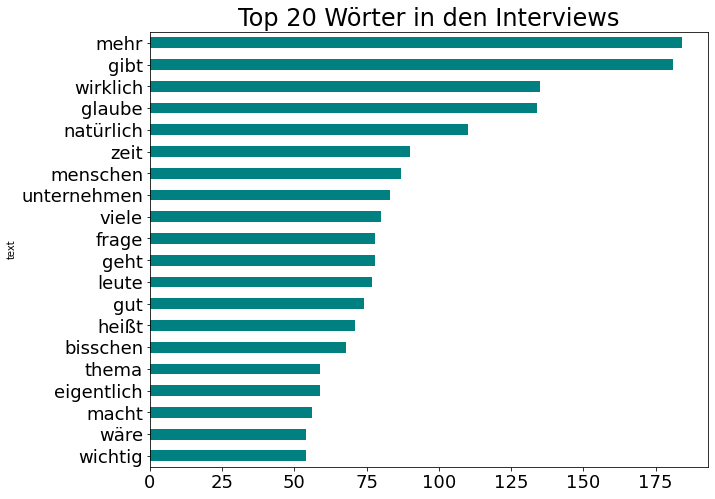

In [6]:
# Top 20 Words in Interviews ohne Stopwords einfach  
df_titles = pd.DataFrame(common_words, columns=["text", "count"])
plt.figure(figsize=(10,8))
df_titles.groupby("text").sum()["count"].sort_values(ascending=True).plot(kind='barh', fontsize=18, color="teal")
plt.title("Top 20 Wörter in den Interviews", fontsize=24);

# Bereinigung der Daten 


In [66]:
#df = df.drop(columns=["id"])
#df.head()

KeyError: "['id'] not found in axis"

In [7]:
# Remove punctuation
df["text"] = \
df["text"].map(lambda x: re.sub("[,\.!?:12]", "", x))

# Convert the texts to lowercase
df["text"] = \
df["text"].map(lambda x: x.lower())

#Tokenize data
data = df.text.values.tolist()
dft = gensim.utils.simple_preprocess(str(data), deacc=True)
print(dft)

['vielen', 'dank', 'auf', 'jeden', 'fall', 'dass', 'du', 'dir', 'die', 'zeit', 'genommen', 'hast', 'ich', 'wurde', 'auch', 'ganz', 'gleich', 'mit', 'dem', 'thema', 'arbeitsmarkt', 'generell', 'vor', 'allem', 'in', 'bezug', 'auf', 'tirol', 'starten', 'wo', 'ich', 'mal', 'mit', 'dem', 'der', 'frage', 'starten', 'wurde', 'wie', 'hat', 'sich', 'der', 'arbeitsmarkt', 'bei', 'uns', 'verandert', 'und', 'was', 'siehst', 'du', 'vor', 'allem', 'in', 'hinblick', 'auf', 'die', 'digitalisierung', 'fur', 'veranderungen', 'kommen', 'start', 'sec', 'end', 'sec', 'also', 'generell', 'sag', 'ich', 'mal', 'wie', 'hat', 'sich', 'der', 'arbeitsmarkt', 'generell', 'einfach', 'verandert', 'das', 'muss', 'man', 'jetzt', 'eigentlich', 'sagen', 'wie', 'war', 'es', 'vor', 'corona', 'vor', 'etwas', 'einem', 'jahr', 'da', 'war', 'ja', 'eine', 'unglaubliche', 'suche', 'einfach', 'auch', 'nach', 'talenten', 'bei', 'allen', 'unternehmern', 'und', 'das', 'hat', 'sich', 'sicher', 'reduziert', 'also', 'da', 'ist', 'jetz

In [14]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(dft, min_count=5, threshold=200) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[dft], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stopwords, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load("en_core_web_sm")
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(dft)  # processed Text Data!
print(data_ready)

[['vielen'], ['dank'], [], [], ['fall'], [], [], [], [], ['zeit'], ['genomman'], ['hast'], [], ['wurde'], [], [], ['gleich'], [], [], ['thema'], ['arbeitsmarkt'], ['generell'], [], [], [], ['bezug'], [], ['tirol'], ['starten'], [], [], [], [], [], [], ['frage'], ['starten'], ['wurde'], [], [], [], [], ['arbeitsmarkt'], [], [], ['verandert'], [], [], ['siehst'], [], [], [], [], ['hinblick'], [], [], ['digitalisierung'], ['fur'], ['veranderungen'], ['komman'], [], [], [], [], [], ['generell'], ['sag'], [], [], [], [], [], [], ['arbeitsmarkt'], ['generell'], [], ['verandert'], [], [], [], [], ['eigentlich'], [], [], [], [], [], ['corona'], [], [], [], ['jahr'], [], [], [], [], ['unglaubliche'], ['suche'], [], [], [], ['talenten'], [], [], ['unternehmern'], [], [], [], [], ['sicher'], ['reduziert'], [], [], [], [], ['sicher'], [], ['nachfrage'], [], ['mitarbeitern'], [], [], ['naturlich'], [], ['aufgrund'], [], ['gesamtsituation'], [], [], ['unsicherheit'], [], [], ['vielen'], ['unternehma

In [15]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)
# Create Corpus with Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]


# LDA Model 



In [16]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha="symmetric",
                                           iterations=100,
                                           per_word_topics=True)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.291*"fur" + 0.000*"cyclo" + 0.000*"ware" + 0.000*"dafur" + 0.000*"konnte" '
  '+ 0.000*"gut" + 0.000*"veranstaltung" + 0.000*"sowa" + 0.000*"finde" + '
  '0.000*"webseite"'),
 (1,
  '0.006*"geht" + 0.000*"cyclo" + 0.000*"dafur" + 0.000*"ware" + 0.000*"finde" '
  '+ 0.000*"konnte" + 0.000*"gut" + 0.000*"veranstaltung" + 0.000*"sowa" + '
  '0.000*"webseite"'),
 (2,
  '0.435*"gibt" + 0.000*"cyclo" + 0.000*"dafur" + 0.000*"ware" + 0.000*"finde" '
  '+ 0.000*"konnte" + 0.000*"gut" + 0.000*"veranstaltung" + 0.000*"sowa" + '
  '0.000*"geben"'),
 (3,
  '0.269*"uber" + 0.012*"menschen" + 0.000*"cyclo" + 0.000*"dafur" + '
  '0.000*"ware" + 0.000*"konnte" + 0.000*"finde" + 0.000*"veranstaltung" + '
  '0.000*"gut" + 0.000*"sowa"'),
 (4,
  '0.140*"mehr" + 0.000*"cyclo" + 0.000*"dafur" + 0.000*"ware" + '
  '0.000*"konnte" + 0.000*"veranstaltung" + 0.000*"gut" + 0.000*"sowa" + '
  '0.000*"finde" + 0.000*"webseite"'),
 (5,
  '0.274*"leute" + 0.038*"glaube" + 0.000*"cyclo" + 0.000*"ware" + '


In [30]:
# LDA with Skit Learn 
from sklearn.feature_extraction.text import CountVectorizer 
count = CountVectorizer(stop_words = stopwords,
                       max_df = .3, 
                       max_features = 5000)
data_ready = count.fit_transform(df["text"].values)

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 10,
                               random_state = 123, 
                               learning_method="batch")
# fitting LDA
topics = lda.fit_transform(data_ready)

# access components to extract matrix 
lda.components_.shape


(10, 4924)

In [29]:
# Top 10 words for 10 topics 
n_top_words = 10
feature_names = count.get_feature_names()
for topic_idx, topic in enumerate(lda.components_):
    print ("Topic %d: " % (topic_idx + 1))
    print (" ".join([feature_names[i]
                    for i in topic.argsort() \
                     [:-n_top_words - 1:-1]]))
    

Topic 1: 
tauschkreise 566 5380 teilnehmer projekt ziehen ersetzen anwalt anscheinend 43
Topic 2: 
aufteilt berufliche unglaubliche gewerkschaften lehrer freiraum einstellen perspektiven positiv mitgestalten
Topic 3: 
aufteilt berufliche unglaubliche gewerkschaften lehrer freiraum einstellen perspektiven positiv mitgestalten
Topic 4: 
aufteilt berufliche unglaubliche gewerkschaften lehrer freiraum einstellen perspektiven positiv mitgestalten
Topic 5: 
cyclos talente endeffekt talentenetz ideen tolle veranstaltung kriegen elan kufstein
Topic 6: 
enorm uber faktor holen deutlich wertschöpfung risiken hardware shared länder
Topic 7: 
aufteilt berufliche unglaubliche gewerkschaften lehrer freiraum einstellen perspektiven positiv mitgestalten
Topic 8: 
angeht guthaben blockchain hamburg nutzer leistungserbringer drin vereinsleben aktiven hey
Topic 9: 
virtuell lemberger privaten life kriegen sag glück jährigen hilfs raumplanung
Topic 10: 
arbeitswelt manchmal präsenz kreditsystem studie mit


# Visualisierungen

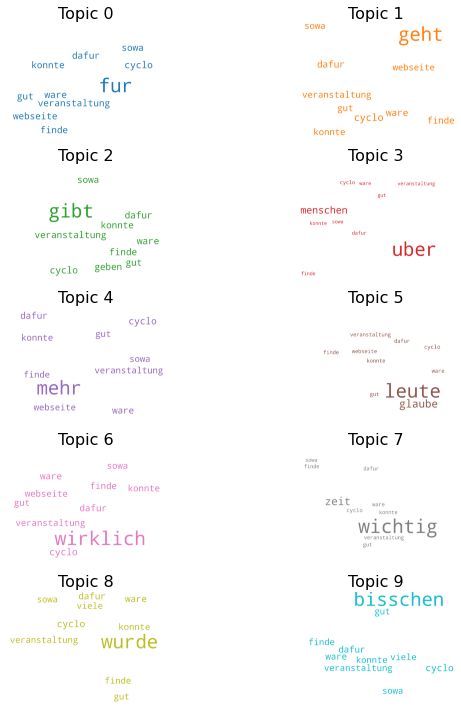

In [31]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


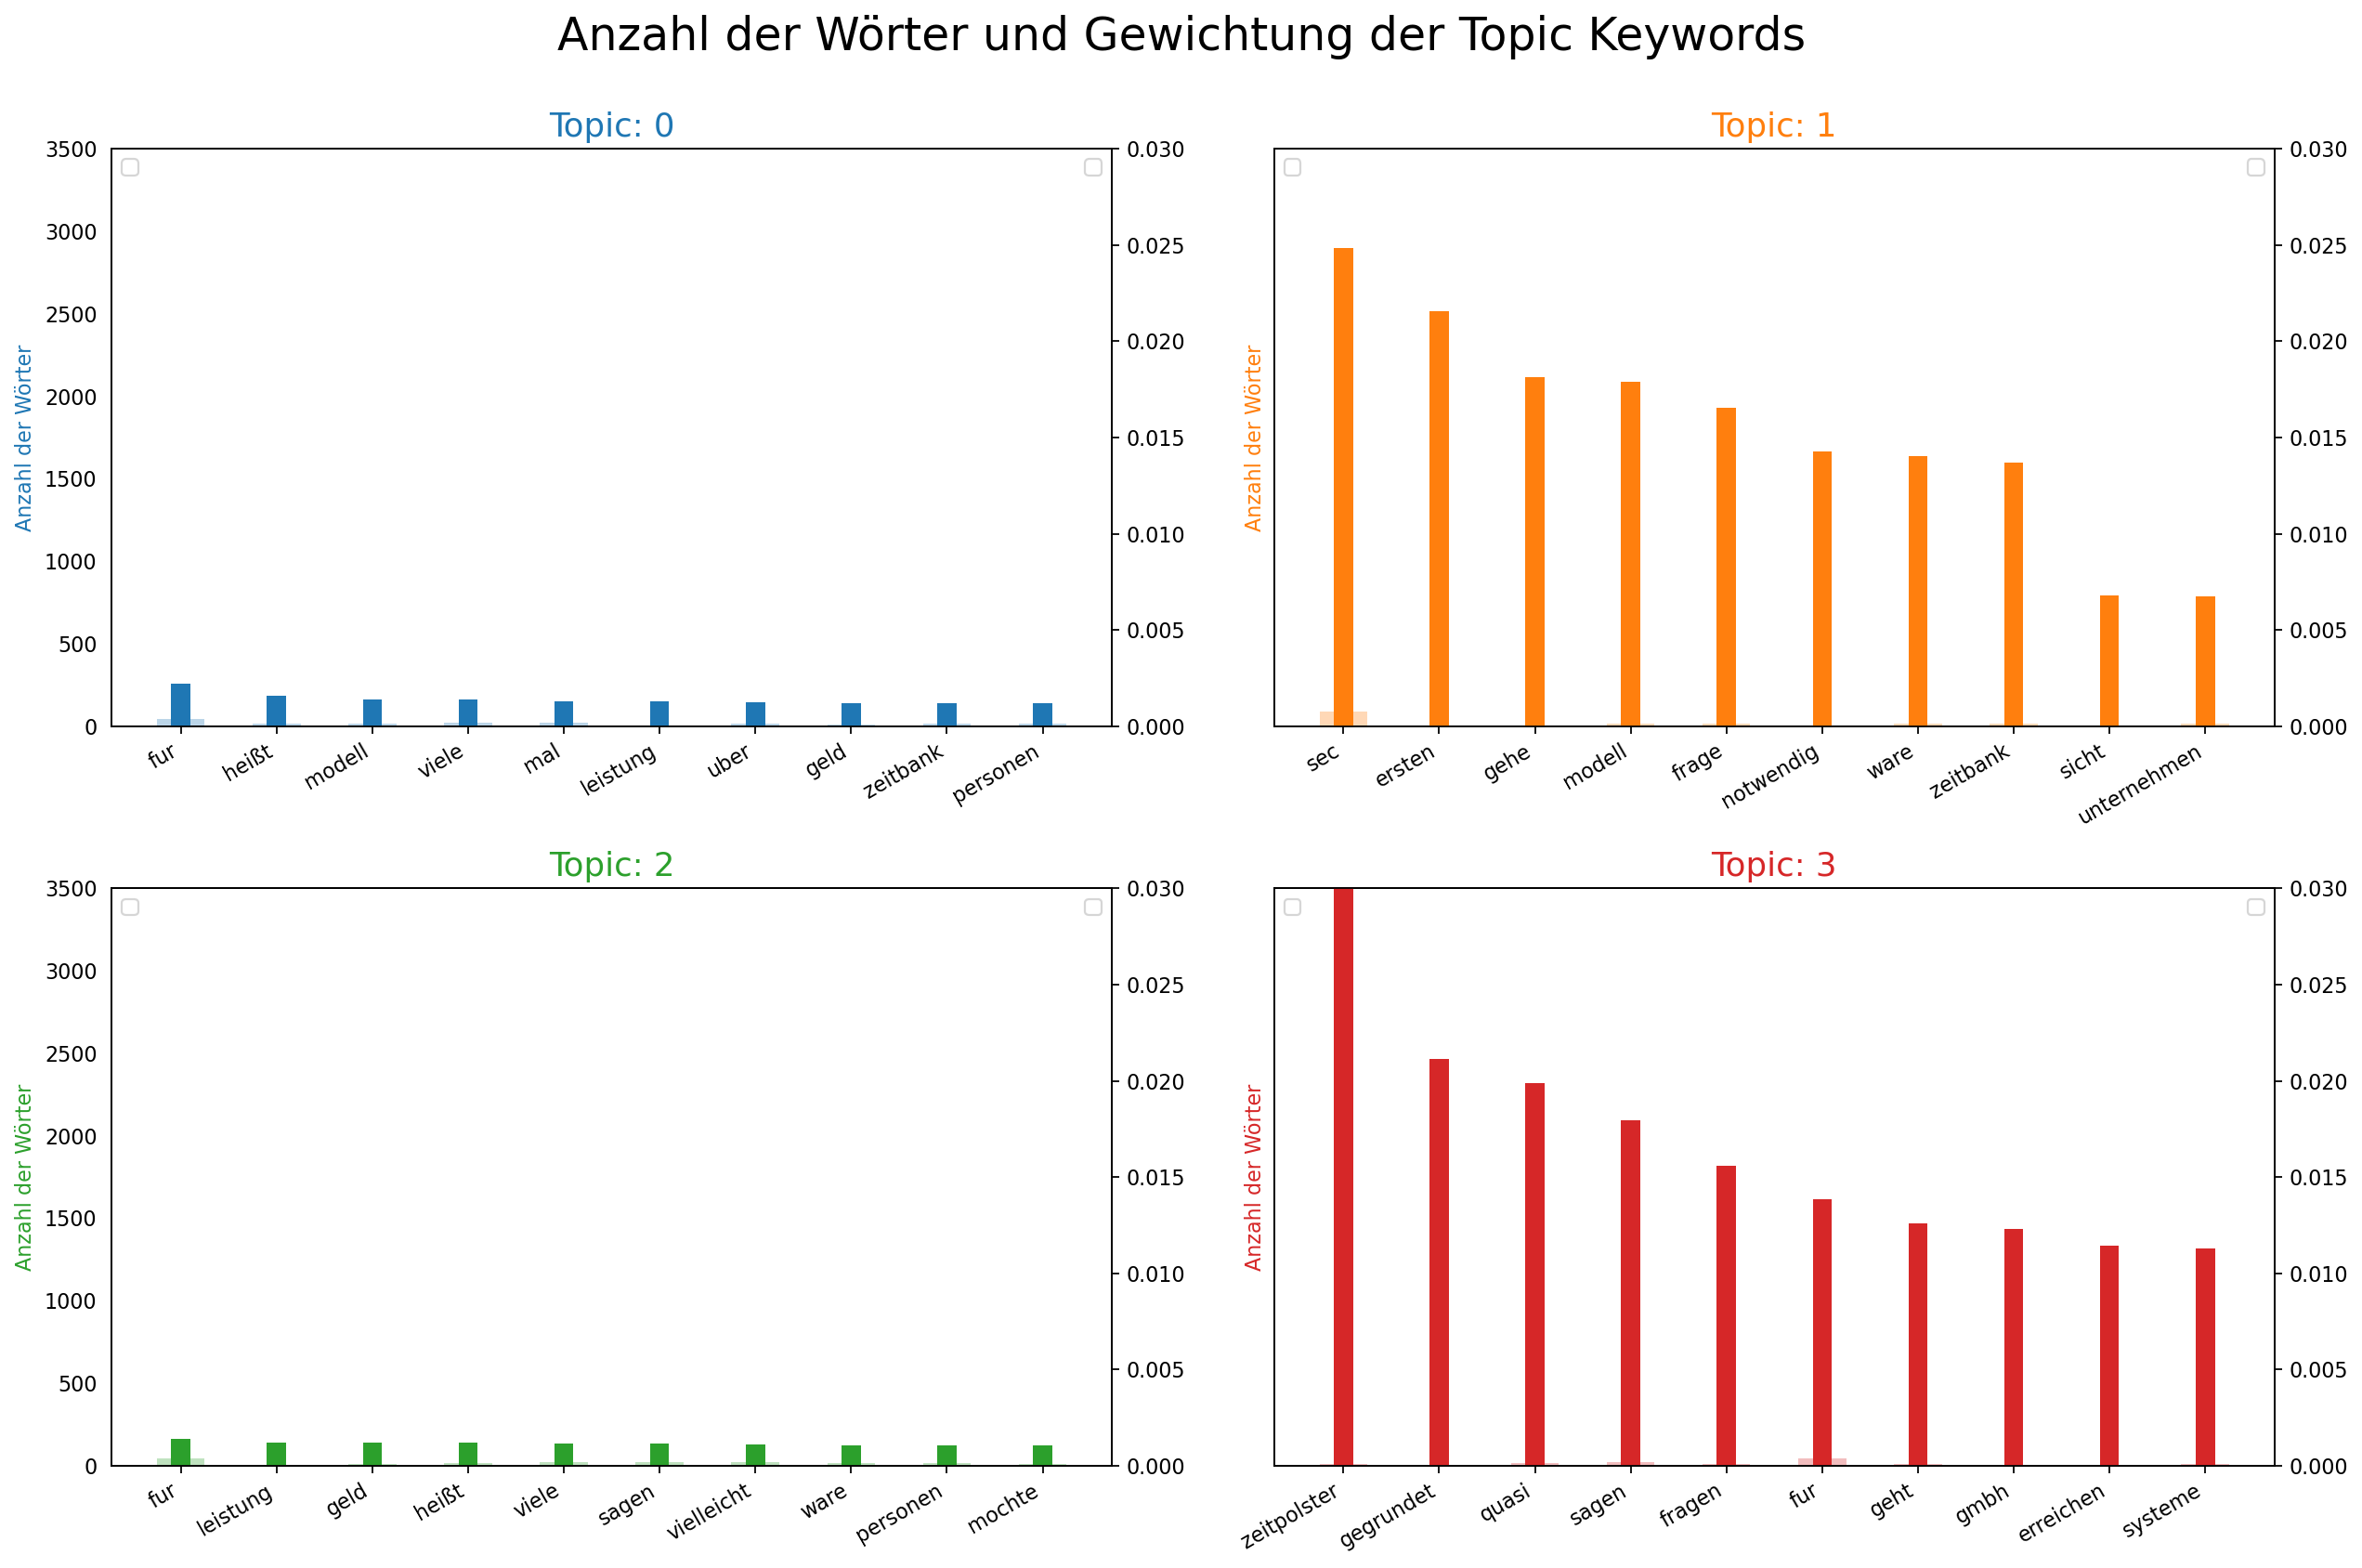

In [39]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=["Wort", "topic_id", "Gewichtung", "Anzahl Wörter"])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x="Wort", height="Anzahl Wörter", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3)
    ax_twin = ax.twinx()
    ax_twin.bar(x="Wort", height="Gewichtung", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2)
    ax.set_ylabel("Anzahl der Wörter", color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title("Topic: " + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, "Wort"], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle("Anzahl der Wörter und Gewichtung der Topic Keywords", fontsize=22, y=1.05)    
plt.show()

In [40]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

c:\python\python37\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.121563 -0.073166       1        1  38.623263
5     -0.143242  0.097452       2        1  26.201653
7      0.037063 -0.075737       3        1  16.357084
3     -0.039782 -0.058849       4        1  12.094859
9      0.073663  0.040515       5        1   3.125795
1      0.028190  0.028131       6        1   3.047367
0      0.037332  0.006136       7        1   0.137495
2      0.040467  0.008338       8        1   0.137495
8      0.039282  0.014373       9        1   0.137495
4      0.048589  0.012806      10        1   0.137495, topic_info=            Term       Freq      Total Category  logprob  loglift
161          sec  84.000000  84.000000  Default  30.0000  30.0000
292     wirklich  22.000000  22.000000  Default  29.0000  29.0000
225  zeitpolster  16.000000  16.000000  Default  28.0000  28.0000
134       modell  11.000000  11.000000  Default  27.0000  27.0000
423     personen  22.000000  22.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
291         ware   0.003549  15.424692  Topic10  -7.1562  -1.7878
361         geld   0.003529   9.820127  Topic10  -7.1617  -1.3418
187         uber   0.003515  16.216564  Topic10  -7.1659  -1.8475
158        sagen   0.003519  25.782768  Topic10  -7.1647  -2.3100
134       modell   0.003464  11.299625  Topic10  -7.1803  -1.5007

[633 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
483       1  0.384793          aktiv
483       3  0.577189          aktiv
1185      4  0.804744        almenda
1053      2  0.830698   alternativen
4         1  0.281957  anforderungen
...     ...       ...            ...
225       4  0.824699    zeitpolster
636       1  0.453556        zukunft
636       2  0.544267        zukunft
621       3  0.810016         zuruck
478       1  0.815514          zweck

[412 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 8, 4, 10, 2, 1, 3, 9, 5])